In this notebook we will apply `TableAutomization.py` file to six modal distribution.

### Importing the needed libraries 

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 


# The six modal distribution


The given probability density function is:

$\pi(x,y) \propto \exp\left(-\frac{x^2}{2}\right) \exp\left(\frac{-(\csc^5(y) - x)^2}{2}\right) \quad (-10< x,y < 10)$

 Gradient of the log-pdf


$\nabla \log \pi(x, y) = \left(\csc^5(y) - 2x, \; 5 (\csc^5(y) - x) \csc^5(y) \cot(y)\right)$

In [2]:

target_sixmodal =BC.Sixmodal()

### Plotting the "sixmodal"

/app/CUQIpy-Benchmarks/benchmarksClass/_sixmodal.py:11: RuntimeWarning: divide by zero encountered in scalar power
  return (- x[0]**2 - ((np.sin(x[1]))**(-5) - x[0])**2)/2


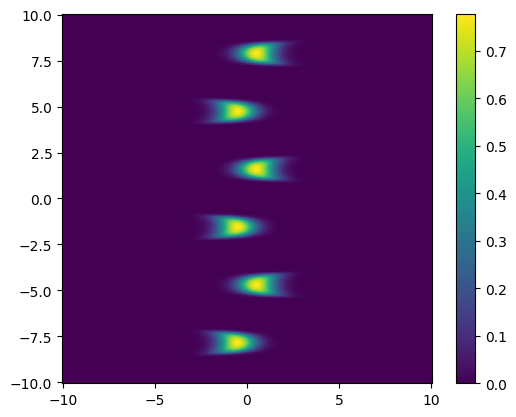

In [3]:
TA.plot_pdf_2D(target_sixmodal, -10, 10, -10, 10,N2=201)

## Example 



In this example, We used a fixed inital point in a high density area. Note that we used smaller sample size for NUTS to reduce the comuptational cost.


In [4]:
df, (fig, axs) = TA.create_comparison(target_sixmodal, scale = [1,1,0.1,0.3,0.05], Ns = [8500,8500,8500,8500,850], Nb = [1500,1500,1500,1500,150], x0 = np.array([1,2]), seed = 12,chains=1,selected_criteria= ["ESS", "AR", "LogPDF", "Gradient","Rhat"], selected_methods =["MH_fixed", "CWMH", "ULA", "MALA", "NUTS"])

Sample 10000 / 10000

Average acceptance rate: 0.24964705882352942 

Sample 10000 / 10000

Average acceptance rate all components: 0.48911764705882355 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 1000 / 1000


/app/CUQIpy-Benchmarks/benchmarksClass/_sixmodal.py:11: RuntimeWarning: divide by zero encountered in scalar power
  return (- x[0]**2 - ((np.sin(x[1]))**(-5) - x[0])**2)/2


In [5]:
TA.print_table(df)

+----------+---------+----------+-------+---------+----------+-------+----------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1)  |   AR  |  LogPDF  | Gradient |
+----------+---------+----------+-------+---------+----------+-------+----------+----------+
| MH_fixed |   8500  |   1500   |  1.0  |  84.698 |   7.0    |  0.25 |  10000   |    0     |
|   CWMH   |   8500  |   1500   |  1.0  | 106.154 |  9.005   | 0.609 |  19999   |    0     |
|   ULA    |   8500  |   1500   |  0.1  |  43.222 |  43.22   |  1.0  |  10000   |  10000   |
|   MALA   |   8500  |   1500   |  0.3  | 800.092 | 1428.621 | 0.489 |  10000   |  10000   |
|   NUTS   |   850   |   150    |   -   |  49.12  |  90.507  |  1.0  | 57837660 | 57837660 |
+----------+---------+----------+-------+---------+----------+-------+----------+----------+


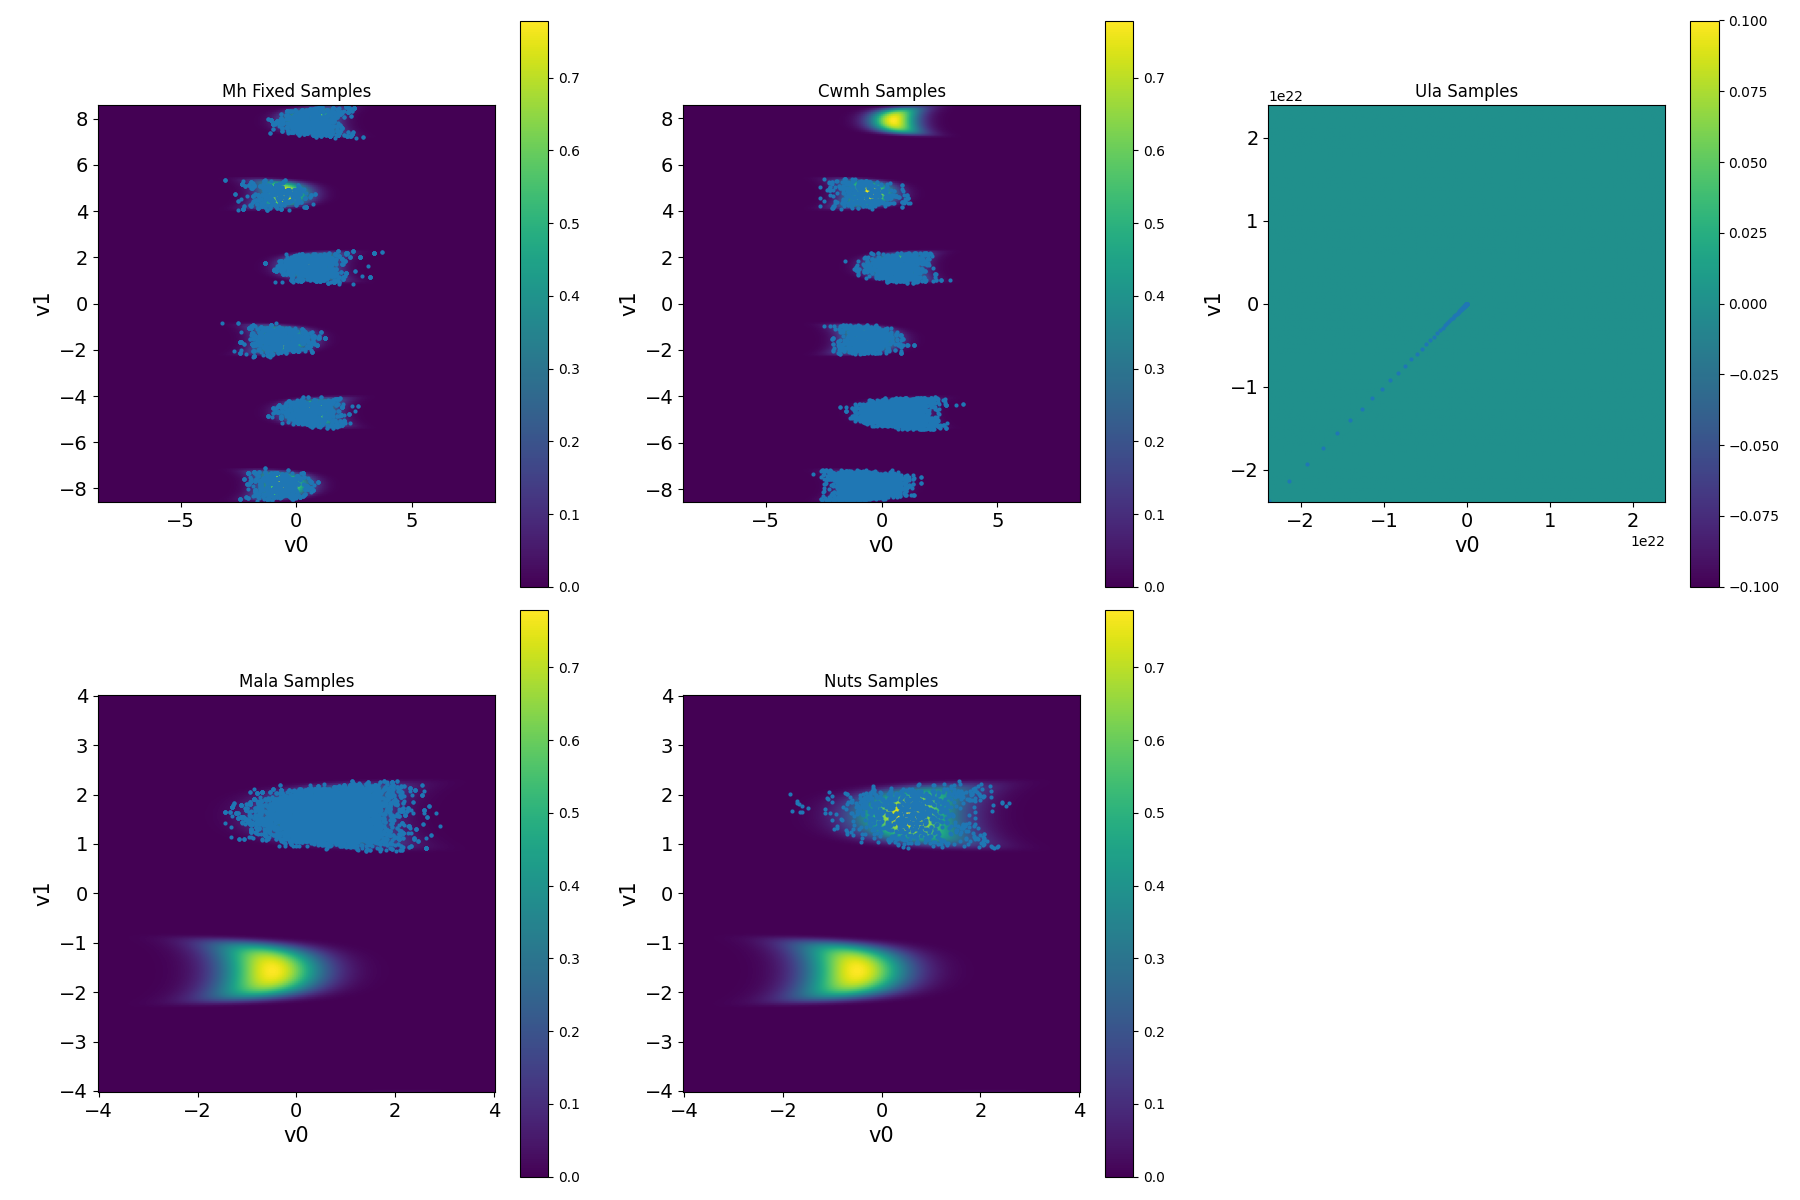

In [6]:
TA.show_plot(fig)

### observation
- MH perfomrs well.
- Gradient based sampling stuck in a local high-density area.
- Ula samplped from wrong areas.
